In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 40s 0us/step


In [3]:
y_train.shape

(50000, 1)

In [4]:
y_test = y_test.reshape(-1,)

In [5]:
image_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])        
    plt.xlabel(image_classes[y[index]])

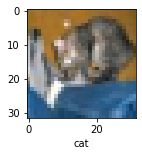

In [7]:
plot_sample(X_test, y_test, 0)

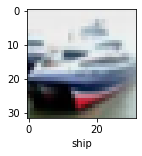

In [8]:
plot_sample(X_test, y_test, 1)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
deep_learning_model = models.Sequential([
    # The first part is the Convolution layer..
    # In this part, we extract the features from the photos to be able to identify them...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # The second part is a classical Articial Neural Network layer.
    # We will train our ANN model according to the above features and training information.
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
deep_learning_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6850 - accuracy: 0.3854
Epoch 2/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1266 - accuracy: 0.6051
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9698 - accuracy: 0.6619
Epoch 4/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8808 - accuracy: 0.6915
Epoch 5/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8216 - accuracy: 0.7175


In [13]:
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9254 - accuracy: 0.6840


[0.9253911972045898, 0.6840000152587891]

In [14]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

array([[1.8404799e-03, 2.5731229e-04, 4.0696762e-03, 6.0282648e-01,
        5.9549739e-03, 1.0388556e-01, 5.4294638e-02, 6.7796250e-04,
        2.2579287e-01, 4.0009877e-04],
       [3.7923735e-02, 4.0956220e-01, 1.4124856e-04, 7.1187828e-06,
        1.1638967e-05, 5.1668076e-07, 9.7889381e-07, 6.9912135e-06,
        5.4990160e-01, 2.4439499e-03],
       [7.6152205e-02, 5.9780192e-01, 2.8791032e-03, 1.0757916e-02,
        2.6964296e-03, 1.3643667e-03, 3.2666980e-03, 1.3369832e-03,
        2.8731471e-01, 1.6429652e-02]], dtype=float32)

In [15]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred]
y_predictions_siniflari[:3]

[3, 8, 1]

In [16]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

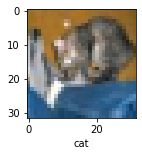

In [17]:
plot_sample(X_test, y_test,0)

In [18]:
image_classes[y_predictions_siniflari[0]]

'cat'

'ship'

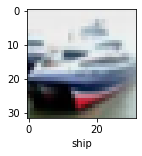

In [19]:
plot_sample(X_test, y_test,1)


# In[25]:


image_classes[y_predictions_siniflari[1]]

'automobile'

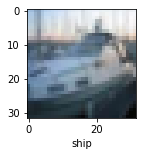

In [20]:
plot_sample(X_test, y_test,2)


# In[27]:


image_classes[y_predictions_siniflari[2]]